In [96]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## 1.2 確率論

### 1.2.4 ガウス分布

$$
N(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

- $\mu$は平均
- $\sigma^2$は分散

独立同分布（正規分布）から平均と分散を推定する

サンプル平均は
$$
\mu_{ML} = \frac{1}{N}\sum^{N}_{n=1}{x_n}
$$

サンプル分散は
$$
\sigma^2_{ML} =  \frac{1}{N}\sum^{N}_{n=1}{(x_n-\mu_{ML})^2}
$$


これらはガウシアンの尤度関数の対数を取ったものを最大化するときの平均と分散である
$$
\ln p(x|\mu, \sigma^2) = -\frac{1}{2\sigma^2}\sum^{N}_{n=1}{(x_n-\mu_{ML})^2}-\frac{N}{2}\ln \sigma^2 -\frac{N}{2}\ln(2\pi)
$$

これが尤度関数の対数を取ったものである

In [97]:
def sample_mean(data):
    return data.mean()

def sample_variance(data, mean):
    sum = 0
    for item in data:
        sum += (item - mean)**2
    return sum / len(data)

In [98]:
true_mean = 5
true_sigma = 3
sample_size = np.arange(10, 10000, 10)
l_mean = []
l_var = []
for size in sample_size:
    x = np.random.normal(true_mean, true_sigma, size)
    m = sample_mean(x)
    l_mean.append(m)
    v = sample_variance(x, m)
    l_var.append(v)


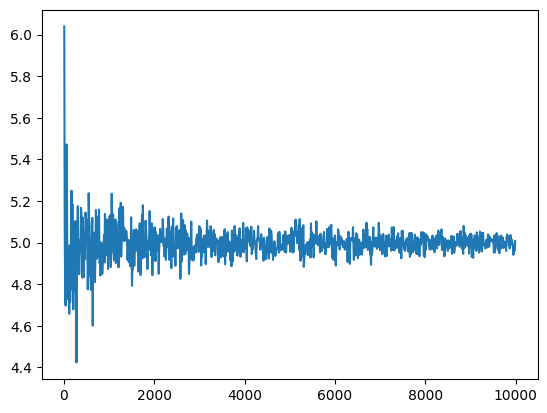

In [99]:
plt.plot(sample_size, l_mean)

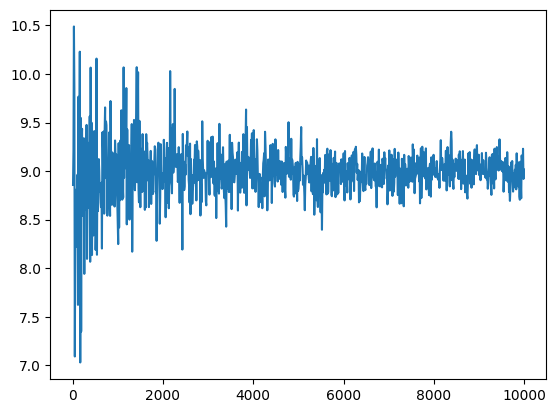

In [100]:
plt.plot(sample_size, l_var)


### 1.2.5 曲線フィッティング再訪

曲線フィッティングの例に戻ってそれを確率的な観点から眺め、誤差関数と正則化に関する洞察を得るとともに、完全なベイズ的取扱いに進む

N個の入力値で構成される訓練データの集合$\mathbf{x} = (x_1, x_2, ..., x_N)$とそれに対応する目標値$\mathbf{t} = (t_1, t_2, ..., t_N)$

対応する$t$は平均が多項式曲線$y(x,\mathbf{w})$に等しいガウス分布に従うものとすると

$$
p(t|x, \mathbf{w}, \beta) = N(t|y(x,\mathbf{w}), \beta^{-1})
$$

となる。

これは入力データ、多項式の係数、ガウシアンの分散の条件のもと目標値があらわれる確率を表している。

これで訓練データ${\mathbf{x}, \mathbf{t}}$を使って未知のパラメータ$\mathbf{w}, \beta$を求めるのに最尤推定を使うことができる。

尤度関数は
$$
p(\mathbf{t}|\mathbf{x}, \mathbf{w}, \beta) = \prod_{n=1}^{N} N(t_n | y(x_n, \mathbf{w}), \beta^{-1})
$$
となり、対数尤度関数は
$$
\ln p(\mathbf{t}|\mathbf{x}, \mathbf{w}, \beta) = -\frac{\beta}{2}\sum_{n=1}^{N}{\{y(x_n, \mathbf{w}) - t_n\}^2} 
+\frac{N}{2} \ln \beta - \frac{N}{2} \ln (2\pi)
$$
となる。

対数尤度関数において$\mathbf{w}$を最大化する。つまり、二乗和誤差を最小化する。

次に$\beta$の最大化であるが、これは1.2.4における分散の最大化と同じである。

予測分布という形でtの確率分布を与えることができる。
$$
p(t|x, \mathbf{w_{ML}}, \beta_{ML}) = N(t|y(x,\mathbf{w_{ML}}), \beta^{-1}_{ML})
$$

## 1.3 モデル選択

キーワード

- 学習用集合（学習データセット）

- 確認用集合（検証データセット）

- テスト集合（テストデータセット）

の三つにデータセットを分けて学習を行う（sklearn.model_selection.train_test_split関数）

検証データセットの活用法

- 交差検証（クロスヴァリデーション）
- 一個抜き法（LOO法）

交差検証のメリットは少ないデータから過学習を避け、汎化性能の高いモデルを作成することができることである

交差検証のデメリットは訓練を行わないといけない回数が増えることである

## 1.4 次元の呪い

キーワード

入力空間を高次元に拡張した場合、指数的に必要なデータ数が増加する。

3次元空間での生活経験を通じて形成された我々の幾何学的直観は、高次元空間を考えるときには誤りに陥りやすい。

単純な例としてD次元空間の半径r=1の球を考え、　$r=1-\epsilon$　と　$r=1$　の間にある体積の割合がどれだけになるか考える。

一般にD次元空間の球の体積は以下の式で記述される。($K_D$はDのみに依存する比例定数)
$$
V_D(r) = K_D r^D
$$
したがって$r=1-\epsilon$　と　$r=1$　の間にある体積の割合は以下で記述される
$$
\frac{V_D(1) - V_D(1-\epsilon)}{V_D(1)} = 1 - (1 - \epsilon)^D
$$

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
def V_D_proportion(D: int, e: float) -> int:
    return 1 - (1 - e)**D

In [128]:
dim = np.arange(1, 21, 2)
epsilon = np.linspace(0, 1, 11000)
d_proportion = {}
for d in dim:
    d_proportion[d] = []
    for e in epsilon:
        d_proportion[d].append(round(V_D_proportion(d, e), 5))


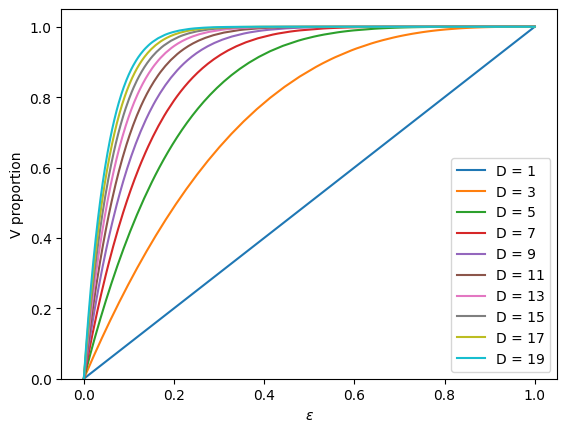

In [129]:
for d in dim:
    plt.plot(epsilon, d_proportion[d], label=f"D = {d}")
plt.ylim(0, 1.05)
plt.xlabel("$\epsilon$")
plt.ylabel("V proportion")
plt.legend()

この図を見ると高次元では球のほとんどの体積は表面に近い薄皮に集中している！

大きい次元の空間に伴う困難のことを次元の呪いという

次元の呪いの解決策

- 特徴選択：関連性の低いまたは冗長な特徴を削除し、次元を減らす
- 次元削減：主成分分析（PCA）やt-SNEなどの次元削減技術を使用して、データの次元を減らす
- 正則化（Regularization）: モデルの複雑さを制御するために正則化テクニックを使用すると、次元の呪いの影響を減らすことができる場合がある
- データ増強（Data Augmentation）: より多くのデータを収集するか、データ増強技術を使用して、学習に利用できるデータ量を増やすことが助けになる場合がある。
- カーネル法やマニホールド学習: カーネル法を使用してデータの非線形関係を捉えるか、マニホールド学習でデータの潜在的な低次元構造を探ることも有効なアプローチ
- アンサンブル学習: 複数のモデルを組み合わせることで、高次元のデータに対する予測の精度を向上させることができることがある

## 1.5 決定理論

決定理論は確率論と組み合わせることによってパターン認識で遭遇する、不確かさを含む状況における最適な意思決定を行うことを可能にする。

入力ベクトル$\mathbf{x}$に対して目的変数$\mathbf{t}$があり、同時確率分布$p(\mathbf{x},\mathbf{t})$を訓練データ集合から決める（推論する）ことは本講の目的の一つである

しかし、実際の応用ではtが取りうる値に応じて特定の行動を取ることが多い

### 1.5.1 誤識別率の最小化

- 決定領域：クラス分類において各クラスに1つずつ対応する領域を入力ベクトルのもと作成し、その領域に存在する値はそのクラスであると決定する

誤識別率を最小化したいとき、誤った決定をする確率を以下の式で記述する($C_k$はクラスkを表し、$R_k$はクラスkの決定領域を表す)
$$
p(false) = \sum_{k} {p(\mathbf{x}\notin R_k, C_k)}
$$
これはクラスk以外の決定領域に存在する入力ベクトルをクラスkに割り当てることを表している

xがクラスkである確率を各クラスで計算して最も確率が高いクラスにxが属すると決定することで誤識別率を最小化することができる

In [130]:
from scipy import stats
import numpy as np

In [178]:
x = np.linspace(-3, 8, 151)
y1 = 1.5*stats.norm.pdf(x, 1, 0.7) + stats.norm.pdf(x, 3.5, 1)
y2 = 1.5*stats.norm.pdf(x, 3.5, 1)



In [184]:
x_0 = 2.4
x_hat = 3.5

x_new = np.linspace(x_0, x_hat, 12)
y3 = 1.5*stats.norm.pdf(x_new, 1, 0.7) + stats.norm.pdf(x_new, 3.5, 1)
y4 = 1.5*stats.norm.pdf(x_new, 3.5, 1)

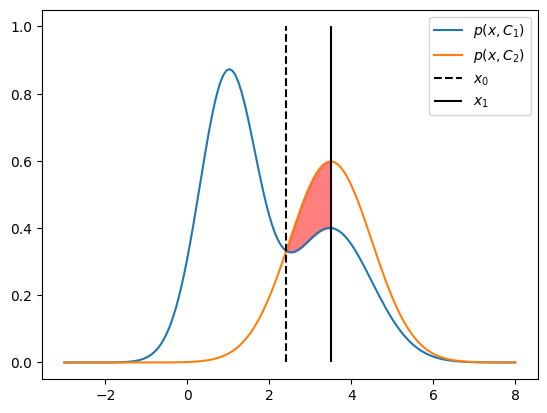

In [194]:
plt.plot(x, y1, label="$p(x, C_1)$")
plt.plot(x, y2, label="$p(x, C_2)$")
plt.vlines(x_0, 0, 1, colors="black", linestyles="--", label="$x_0$")
plt.vlines(x_hat, 0, 1, colors="black",label="$x_1$")
plt.fill_between(x_new, y1=y3, y2=y4, color="r", alpha=0.5)

plt.legend()

上記の図において$x_1$を決定境界としてしまうと赤色の部分が誤識別となる可能性が高い。
そのため、$x_0$を決定境界とすることが誤識別率を最も小さくする

### 1.5.2 期待損失の最小化

クラス分類はクラスによっては誤識別の重みが違う場合がある

例えば癌の検査で本当は癌であるのに健康と誤った診断をする場合と本当は健康であるのに癌であると誤った診断をする場合では前者の方が誤識別のリスクが高い

損失関数・損失行列を設定することで各クラスごとの誤識別の重みを考慮したうえで損失を最小化する手法がある

### 1.5.3 棄却オプション

クラス分類においてすべてのクラスの確率がある閾値を超えない場合はその判断を専門家にゆだねるといった方法がとられる場合がある

### 1.5.4 推論と決定

これまでクラス分類問題を2つの段階に分けて考えた
- 推論段階：訓練データからモデルを学習
- 決定段階：事後確率を使って最適なクラス割り当て

さらに、両方の問題を同時に解いて、入力$x$から直接決定関数を学習する識別関数がある

以下三つのアプローチを考える
##### 生成モデル（最も計算コストが高く詳細である）

$p(\mathbf{x}|C_k)$をクラス$C_k$ごとに決める推論問題を解く

事前クラス確率$p(C_k)$もそれぞれ別に求める

ベイズの定理より$p(C_k|\mathbf{x})$を求める

事後確率がわかれば新たな入力のクラス属性を決めることに役立つ

例: ガウス混合モデル、隠れマルコフモデルなど

##### 識別モデル
識別モデルは、与えられた入力データが特定のクラスに属する確率を直接モデル化する

つまり、クラスと特徴間の境界を学習することに焦点を当て、データがどのように生成されるかではなく、クラス間をどのように区別するかに関心を持つ

識別モデルは、事後確率 
$p(C_k|\mathbf{x})$ を直接学習する

例: ロジスティック回帰、サポートベクターマシンなど

##### 識別関数
識別関数は、特定の入力データがどのクラスに属するかを直接的に決定する関数

識別関数は、クラスのラベルまたはクラス間の境界を直接出力し、確率的な解釈を提供しない場合が多い

識別関数は、多くの場合、識別モデルの一部として見ることができ、クラス間の境界を明確に定義する

例: サポートベクターマシンの識別関数など


生成モデルおよび識別モデルは事後確率を計算するため識別関数よりも計算コストはかかるが事後確率を計算すると以下のことができるようになる
- リスク最小化
- 棄却オプション
- クラス事前分布の補正
- モデルの結合


## 1.6 情報理論